<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Lab2_Classification_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Lab 2 Classification II</b>

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [3]:
def giveAnExample(n):
    clf = tree.DecisionTreeClassifier(max_depth=n, criterion="gini", min_samples_split=2, min_samples_leaf=1, splitter="best", random_state=0)
    X_train, y_train = train_test_split(X, y, random_state=0)
    X_test, y_test = train_test_split(X, y, random_state=0)
    clf = clf.fit(X_train, y_train)
    examples = irisData.sample(n=5, random_state=0)
    for _, example in examples.iterrows():
        features = example[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.reshape(1, -1)
        true_class = example['Class']
        predicted_class = clf.predict(features)[0]
        print(f"True Class: {true_class}, Predicted Class: {predicted_class}")
    correctly_classified = sum(clf.predict(X_test) == y_test) / len(y_test) * 100
    print(f"Percentage Correctly Classified: {correctly_classified}%")
    fig, ax = plt.subplots(figsize=(12, 10))
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names=iris["feature_names"], class_names=iris["target_names"],
                            impurity=False, proportion=True, rounded=True, fontsize=12)
    plt.show()


In [4]:
def giveAnExample(n):
    clf = tree.DecisionTreeClassifier(max_depth=n, criterion="gini", min_samples_split=2, min_samples_leaf=1, splitter="best", random_state=0)
    clf = clf.fit(X_train, y_train)
    examples = irisData.sample(n=5, random_state=0)
    for _, example in examples.iterrows():
        features = example[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.reshape(1, -1)
        true_class = example['Class']
        predicted_class = clf.predict(features)[0]
        print(f"True Class: {true_class}, Predicted Class: {predicted_class}")
    correctly_classified = sum(clf.predict(X_test) == y_test) / len(y_test) * 100
    print(f"Percentage Correctly Classified: {correctly_classified}%")
    fig, ax = plt.subplots(figsize=(12, 10))
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names=iris["feature_names"], class_names=iris["target_names"],
                            impurity=False, proportion=True, rounded=True, fontsize=12)
    plt.show()


In [5]:
iris = load_iris()
X, y = iris.data, iris.target


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
irisData = pd.DataFrame(data=np.hstack((X, y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])),
                        columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])


In [7]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
pair = [2, 3]
clf.fit(X[:, pair], y)

DecisionTreeClassifier(max_depth=3, random_state=0)

True Class: 2, Predicted Class: 2
True Class: 1, Predicted Class: 1
True Class: 0, Predicted Class: 0
True Class: 2, Predicted Class: 2
True Class: 0, Predicted Class: 0
Percentage Correctly Classified: 89.47368421052632%


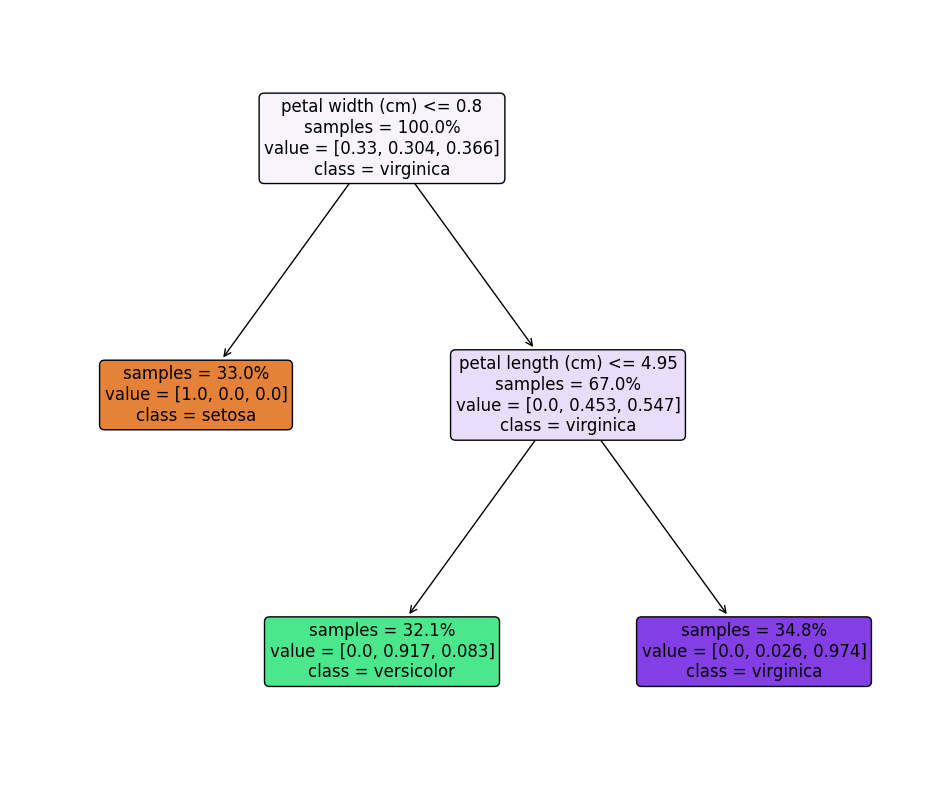

In [8]:
giveAnExample(2)

###Exercise 1:
Evaluate the classes for the given examples using the decision tree and verify the percentage of correctly classified cases.

True Class: 2, Predicted Class: 2
True Class: 1, Predicted Class: 1
True Class: 0, Predicted Class: 0
True Class: 2, Predicted Class: 2
True Class: 0, Predicted Class: 0
Percentage Correctly Classified: 89.47368421052632%


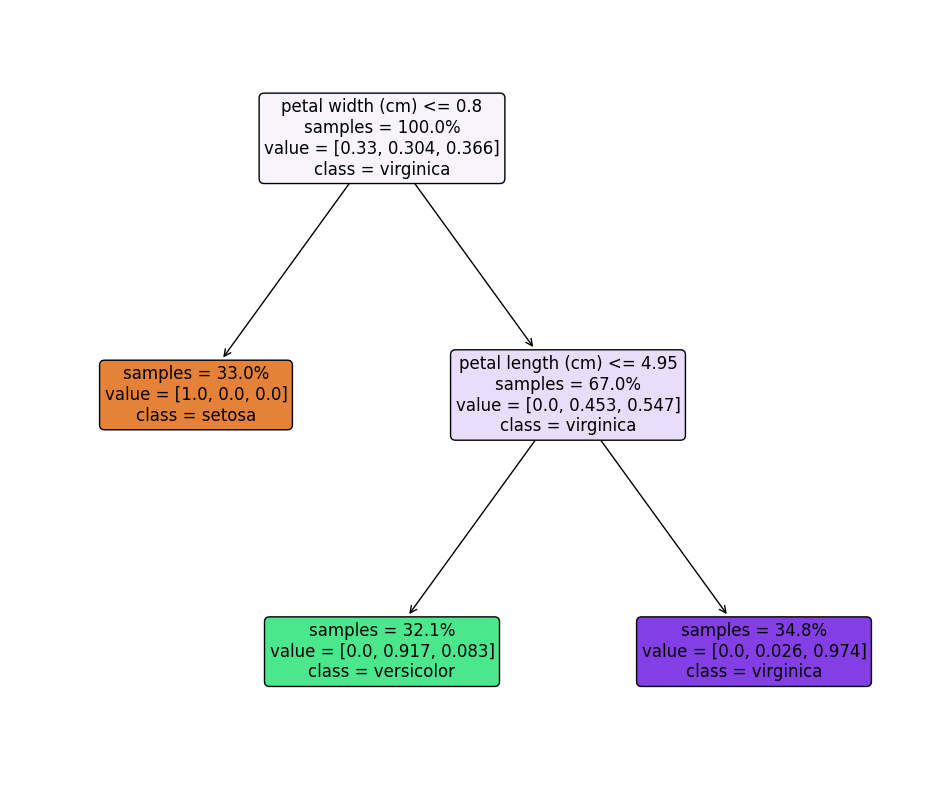

In [9]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
pair = [2, 3]
clf.fit(X[:, pair], y)
giveAnExample(2)

<b>Exercise 2.</b> We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely petal length and petal width are used

In [10]:
petal_features = X[:, pair]

In [11]:
def giveAnExample(n):
    clf = tree.DecisionTreeClassifier(max_depth=n, criterion="gini", min_samples_split=2, min_samples_leaf=1, splitter="best", random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(petal_features, y, random_state=0)
    clf = clf.fit(X_train, y_train)
    x_min, x_max = petal_features[:, 0].min() - 1, petal_features[:, 0].max() + 1
    y_min, y_max = petal_features[:, 1].min() - 1, petal_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.Paired)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(f'Decision Boundary for Decision Tree (Depth={n})')
    plt.show()


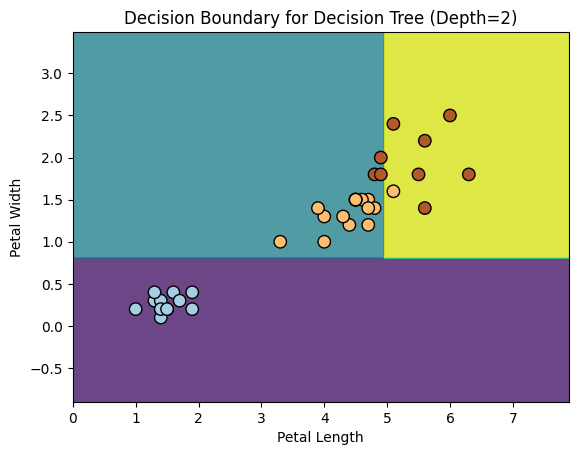

In [12]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
pair = [2, 3]
clf.fit(petal_features, y)
giveAnExample(2)

<b>Exercise 3</b> <br>
<b>Q3.1</b>
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of max_depth) and then pause and ponder.

Test with max_depth of the following values:

2<br>
5<br>
10<br>
What do you observe?

In [13]:
max_depth_values = [2, 5, 10]


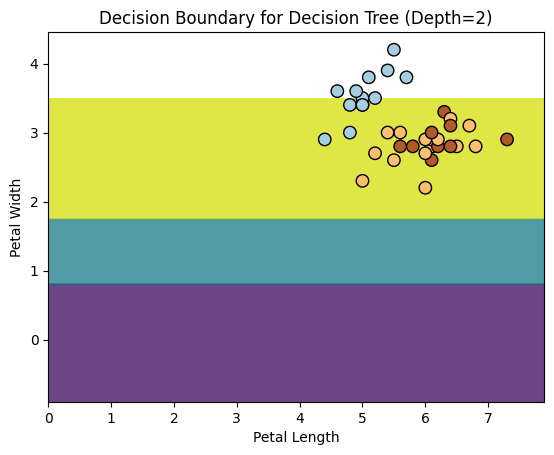

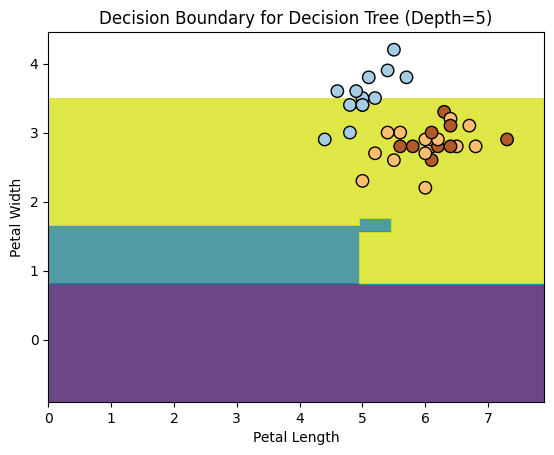

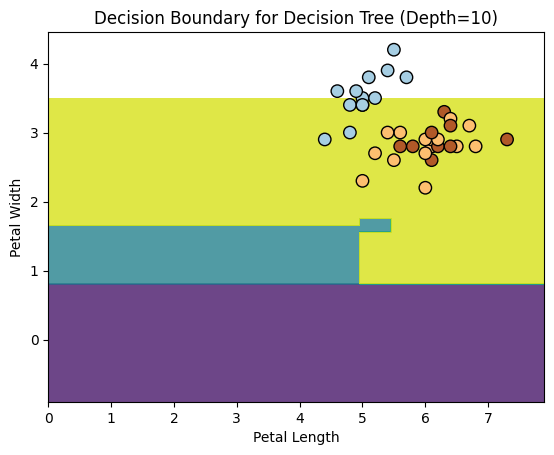

In [14]:
for max_depth_val in max_depth_values:
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=max_depth_val)
    clf.fit(petal_features, y)
    x_min, x_max = petal_features[:, 0].min() - 1, petal_features[:, 0].max() + 1
    y_min, y_max = petal_features[:, 1].min() - 1, petal_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.Paired)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(f'Decision Boundary for Decision Tree (Depth={max_depth_val})')
    plt.show()

<b>Q3.2</b> <br>On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case?

Decision trees are characterized by their decision borders, which are lines that are perpendicular to the primary axes in the plots. Every node in the tree makes decisions, which leads to this behavior.

A decision in a decision tree is based on a threshold value for a particular feature at each internal node. The question "Is feature X greater than (or equal to) a certain value?" is usually used to formulate the judgment. The left branch is taken if the condition is true; if not, the right branch is chosen.


Let us now explore a 2D decision boundary. A vertical or horizontal line that is perpendicular to the chosen axis will be the boundary if the selection is based solely on that feature (axis). In the

<b>Exercise 4 </b><br>Complete the following function predict: which takes in four variables : sepal width, sepal length, petal width, petal length and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested if else statements.

In [15]:
def predict(sepal_width, sepal_length, petal_width, petal_length):
    pair = [2, 3]
    petal_features = np.array([[petal_length, petal_width]])
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
    clf.fit(petal_features, [0])
    if petal_length <= 2.45:
        if petal_width <= 0.8:
            return clf.predict([[petal_length, petal_width]])[0]
        else:
            return clf.predict([[petal_length, petal_width]])[0]
    else:
        if petal_width <= 1.75:
            return clf.predict([[petal_length, petal_width]])[0]
        else:
            return clf.predict([[petal_length, petal_width]])[0]


In [16]:
sepal_width = 3.0
sepal_length = 5.0
petal_width = 1.5
petal_length = 4.0


In [17]:
predicted_class = predict(sepal_width, sepal_length, petal_width, petal_length)
print(f"The predicted class for the given features is: {predicted_class}")

The predicted class for the given features is: 0


<b>Exercise 5.</b><br> Calculate the Entropy of the below collection of 10 datapoints.

In [19]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


In [20]:
from scipy.stats import entropy

In [21]:
classes = [1, 2, 2, 0, 2, 1, 0, 1, 0, 1]

In [22]:
class_counts = np.bincount(classes)
class_probs = class_counts / len(classes)

In [23]:
entropy_value = entropy(class_probs, base=2)

In [24]:
print(f"The entropy of the collection of 10 datapoints is: {entropy_value:.4f}")

The entropy of the collection of 10 datapoints is: 1.5710


<b>Exercise 6.</b><br> Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

In [25]:
petal_lengths = np.array([3.9, 5.6, 5.1, 1.3, 6.1, 3.3, 1.4, 4.8, 1.6, 4.5])
classes = np.array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1])

In [26]:
threshold = 4.0

In [27]:
group1 = classes[petal_lengths <= threshold]
group2 = classes[petal_lengths > threshold]


In [28]:
original_entropy = entropy(np.bincount(classes), base=2)
entropy_group1 = entropy(np.bincount(group1), base=2)
entropy_group2 = entropy(np.bincount(group2), base=2)

In [29]:
weighted_entropy_after_split = (len(group1) / len(classes)) * entropy_group1 + (len(group2) / len(classes)) * entropy_group2


In [30]:
information_gain = original_entropy - weighted_entropy_after_split


In [31]:
print(f"Decision Node: If petal length <= {threshold}, else if petal length > {threshold}")
print(f"Information Gain: {information_gain:.4f}")

Decision Node: If petal length <= 4.0, else if petal length > 4.0
Information Gain: 0.6000
